In [3]:
! pip install scikit-optimize
import numpy as np
import pandas as pd
from skopt.sampler import Sobol
from skopt.space import Real
import pandas as pd
import math

In [5]:
# Set number of samples and seed
n_samples = 2000
np.random.seed(42)

# Define parameter space
space = [
    Real(5, 20, name='HBO1'),
    Real(2.5, 12.5, name='HHB1'),
    Real(25, 55, name='HBO2'),
    Real(15, 35, name='HHB2'),
    Real(10, 20, name='d1'),
    Real(0.9, 6.9, name='a1'),
    Real(1.1, 4.2, name='a2'),
    Real(0.1, 2.5, name='b1'),
    Real(0.3, 3.3, name='b2'),
]

# Initialize Sobol sampler
sobol = Sobol()

# Generate samples
samples = sobol.generate(space, n_samples)

# Convert to DataFrame
df_sobol = pd.DataFrame(samples, columns=[dim.name for dim in space])
df_sobol['d1'] = df_sobol['d1'].round(0)
df_sobol['ID'] = np.arange(1, len(df_sobol) + 1)  # Unique ID 1 to 2000

# Preview
print(df_sobol.head())

# Export to CSV
df_sobol.to_csv("satge1.csv", index=False)

        HBO1       HHB1       HBO2      HHB2    d1        a1        a2  \
0  10.618102  12.007143  46.959818  26.97317  12.0  1.835967  1.280059   
1  18.118102   7.007143  31.959818  16.97317  17.0  4.835967  2.830059   
2   6.868102   4.507143  39.459818  31.97317  19.0  3.335967  3.605059   
3  14.368102   9.507143  54.459818  21.97317  14.0  6.335967  2.055059   
4  16.243102   5.757143  35.709818  29.47317  10.0  1.085967  1.667559   

         b1        b2  ID  
0  2.178823  2.103345   1  
1  0.978823  0.603345   2  
2  0.378823  2.853345   3  
3  1.578823  1.353345   4  
4  1.278823  2.478345   5  


C:\Users\Haiya\anaconda3\Lib\site-packages\skopt\sampler\sobol.py:521: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2000=2000. 
  warnings.warn(


In [7]:

# Load or use existing df_sobol
n_parts = 8
total_rows = len(df_sobol)
rows_per_part = total_rows // n_parts

for i in range(n_parts):
    start = i * rows_per_part
    end = (i + 1) * rows_per_part if i < n_parts - 1 else total_rows
    part_df = df_sobol.iloc[start:end]
    part_df.to_csv(f"stage1_part_{i+1}.csv", index=False)
    print(f"Saved rows {start} to {end-1} → stage1_part_{i+1}.csv")


Saved rows 0 to 249 → stage1_part_1.csv
Saved rows 250 to 499 → stage1_part_2.csv
Saved rows 500 to 749 → stage1_part_3.csv
Saved rows 750 to 999 → stage1_part_4.csv
Saved rows 1000 to 1249 → stage1_part_5.csv
Saved rows 1250 to 1499 → stage1_part_6.csv
Saved rows 1500 to 1749 → stage1_part_7.csv
Saved rows 1750 to 1999 → stage1_part_8.csv


### Plottings 

In [11]:
df_sobol

,HBO1,HHB1,HBO2,HHB2,d1,a1,a2,b1,b2,ID
0,10.618102,12.007143,46.959818,26.973170,12.0,1.835967,1.280059,2.178823,2.103345,1
1,18.118102,7.007143,31.959818,16.973170,17.0,4.835967,2.830059,0.978823,0.603345,2
2,6.868102,4.507143,39.459818,31.973170,19.0,3.335967,3.605059,0.378823,2.853345,3
3,14.368102,9.507143,54.459818,21.973170,14.0,6.335967,2.055059,1.578823,1.353345,4
4,16.243102,5.757143,35.709818,29.473170,10.0,1.085967,1.667559,1.278823,2.478345,5
...,...,...,...,...,...,...,...,...,...,...
1995,17.422301,11.875307,32.296732,17.510279,14.0,4.557647,3.882061,2.442495,1.677076,1996
1996,15.547301,5.625307,28.546732,15.010279,18.0,3.807647,3.494561,0.942495,2.802076,1997
1997,8.047301,10.625307,43.546732,25.010279,13.0,6.807647,1.944561,2.142495,1.302076,1998
1998,19.297301,3.125307,36.046732,30.010279,15.0,2.307647,2.719561,0.342495,0.552076,1999


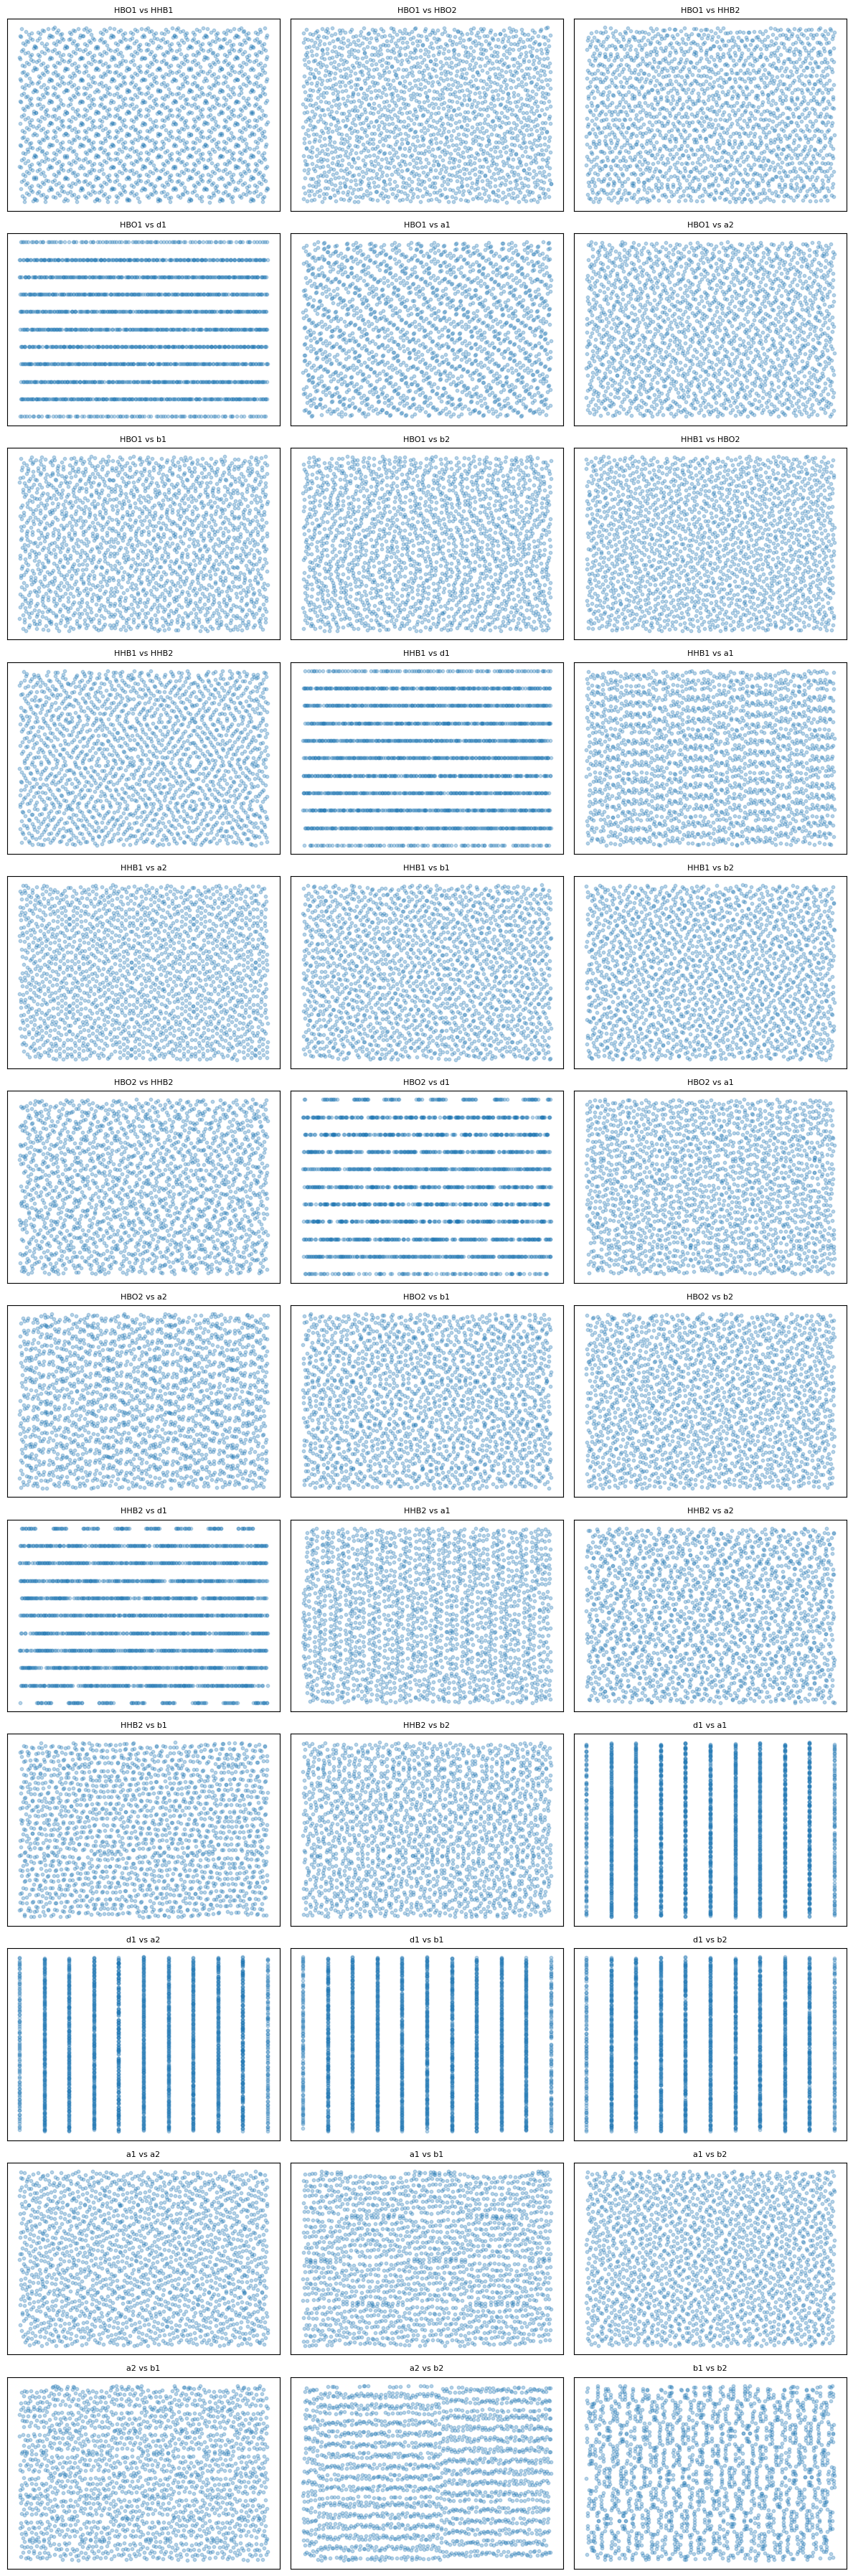

In [13]:
import matplotlib.pyplot as plt
import itertools

# Get first 9 parameter columns (exclude ID if present)
cols = df_sobol.columns[:9]
pairs = list(itertools.combinations(cols, 2))  # 36 combinations

fig, axs = plt.subplots(nrows=12, ncols=3, figsize=(12, 36))
axs = axs.flatten()

for i, (x_col, y_col) in enumerate(pairs):
    ax = axs[i]
    ax.scatter(df_sobol[x_col], df_sobol[y_col], alpha=0.3, s=10)
    ax.set_title(f'{x_col} vs {y_col}', fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])

# Turn off unused axes (if any)
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()
